# Exploratory Data Analysis on Zomato Restaurants Data

This notebook presents an exploratory data analysis (EDA) on Zomato's restaurant dataset for **Kochi**. Various aspects of the dataset, including restaurant types, costs, ratings, localities, and more, have been explored using visualization and summary statistics.

## 1. **Data Inspection and Cleaning**
- **Dataset Loading and Inspection**: The dataset is loaded and inspected to check its structure and details. We examine columns like `res_id`, `name`, `city`, `locality`, `aggregate_rating`, `votes`, `average_cost_for_two`, `cuisines`, `establishment`, and `highlights`.
- **Duplicate Handling**: Duplicate restaurant records are identified and removed, ensuring that each restaurant is unique.

## 2. **City-Specific Data Filtering**
- We filter the dataset to focus on **Kochi** (the selected city) for further analysis.

## 3. **Establishment Type Distribution**
- The distribution of restaurants by establishment type (e.g., **Casual Dining**, **Quick Bites**) is visualized for Kochi. This provides insights into the most common types of restaurants in the city.

## 4. **Casual Dining vs Other Establishments**
- A pie chart is created to show the proportion of **Casual Dining** restaurants compared to other establishment types in Kochi.

## 5. **Top 10 Casual Dining Restaurants by Rating**
- The top 10 **Casual Dining** restaurants in Kochi are identified based on their aggregate ratings, highlighting the best-rated places for casual dining in the city.

## 6. **Top 20 Franchised Restaurants**
- The most frequently occurring restaurant names (franchises) in Kochi are displayed, showing the top 20 franchised restaurants.

## 7. **Restaurant Ratings Calculation**
- A `rating_number` is calculated for each restaurant as the ratio of `aggregate_rating` to the number of `votes`, providing a more accurate measure of ratings.
- The top 10 restaurants in Kochi are identified based on this `rating_number`.

## 8. **Locality-wise Restaurant Distribution**
- The distribution of restaurants across different localities in Kochi is visualized. This helps to understand which areas have more restaurant options.

## 9. **Cuisines Distribution in Kochi**
- The top 20 cuisines offered by restaurants in Kochi are identified based on the number of restaurants serving each cuisine.

## 10. **Average Cost for Two vs Votes**
- The relationship between the **average cost for two persons** and the **number of votes** is explored for the top 20 restaurants in Kochi.

## 11. **Establishments vs Highlights**
- A bar chart is used to explore the relationship between restaurant types (`establishment`) and the **highlights** they offer (e.g., Delivery, Takeaway). This analysis helps in understanding the most common features available in different types of establishments.

## Conclusion
Through this exploratory analysis, we have gained insights into the restaurant scene in **Kochi** based on various factors such as establishment type, cuisine, cost, and rating. Visualizations have been used extensively to represent these insights in an easily understandable format.


#### Import libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#### Import Dataset
(Dataset is from : https://www.kaggle.com/datasets/rabhar/zomato-restaurants-in-india)

In [2]:
df = pd.read_csv("data/zomato_restaurants_in_India.csv")

In [3]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [5]:
df.shape

(211944, 26)

### Data Cleaning

#### Removing duplicates

In [7]:
# Initial metrics
initial_total = df.shape[0]
initial_unique = df['res_id'].nunique()
print(f"Initial total rows: {initial_total}")
print(f"Initial unique restaurants: {initial_unique}")
print(f"Initial dummy data: {initial_total - initial_unique}")

# Remove duplicates
df = df.drop_duplicates(subset="res_id", keep='first')

# Metrics after removing duplicates
final_total = df.shape[0]
final_unique = df['res_id'].nunique()
print(f"\nFinal total rows: {final_total}")
print(f"Final unique restaurants: {final_unique}")
print(f"Final dummy data: {final_total - final_unique}")


Initial total rows: 211944
Initial unique restaurants: 55568
Initial dummy data: 156376

Final total rows: 55568
Final unique restaurants: 55568
Final dummy data: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55568 entries, 0 to 211942
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                55568 non-null  int64  
 1   name                  55568 non-null  object 
 2   establishment         55568 non-null  object 
 3   url                   55568 non-null  object 
 4   address               55550 non-null  object 
 5   city                  55568 non-null  object 
 6   city_id               55568 non-null  int64  
 7   locality              55568 non-null  object 
 8   latitude              55568 non-null  float64
 9   longitude             55568 non-null  float64
 10  zipcode               10945 non-null  object 
 11  country_id            55568 non-null  int64  
 12  locality_verbose      55568 non-null  object 
 13  cuisines              55098 non-null  object 
 14  timings               54565 non-null  object 
 15  average_cost_for_two  5

### Kochi EDA

In [17]:
selected_city = "Kochi"

In [18]:
df_city = df[df.city == selected_city]
df_city.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
108766,902109,Sheba Kuzhimandhi,['Quick Bites'],https://www.zomato.com/kochi/sheba-kuzhimandhi...,"Near BMC, Seaport Airport Road, Kakkanad, Kochi",Kochi,9,Kakkanad,10.028360,76.336614,...,1,Rs.,"['Dinner', 'Cash', 'No Alcohol Available', 'De...",4.3,Very Good,724,24,0.0,-1,-1
108767,900969,Barbeque Nation,['Casual Dining'],https://www.zomato.com/kochi/barbeque-nation-k...,"6th Floor, Imperial Trade Centre, Mahatma Gand...",Kochi,9,Kacheripady,9.982933,76.282294,...,3,Rs.,"['Cash', 'Debit Card', 'No Alcohol Available',...",4.9,Excellent,1132,980,0.0,-1,-1
108768,903046,Nasi And Mee,['Casual Dining'],https://www.zomato.com/kochi/nasi-and-mee-mg-r...,"66/6539, 2nd Floor, Narayanan Seva Sangam Buil...",Kochi,9,MG Road,9.975469,76.283456,...,3,Rs.,"['Dinner', 'Takeaway Available', 'Debit Card',...",4.8,Excellent,310,493,0.0,-1,-1
108769,95361,Ifthar,['Casual Dining'],https://www.zomato.com/kochi/ifthar-1-edappall...,"KK Building, Opposite Pittappillil, Edappally ...",Kochi,9,Edappally,10.028166,76.309804,...,1,Rs.,"['Cash', 'Debit Card', 'Lunch', 'No Alcohol Av...",4.1,Very Good,849,142,0.0,1,-1
108770,901159,Westleys Restocafe,['Café'],https://www.zomato.com/kochi/westleys-restocaf...,"Ground Floor, Kalliyath Building, Mamangalam, ...",Kochi,9,Palarivattom,10.011103,76.303379,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.2,Very Good,341,216,0.0,-1,-1


In [19]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897 entries, 108766 to 112127
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                897 non-null    int64  
 1   name                  897 non-null    object 
 2   establishment         897 non-null    object 
 3   url                   897 non-null    object 
 4   address               897 non-null    object 
 5   city                  897 non-null    object 
 6   city_id               897 non-null    int64  
 7   locality              897 non-null    object 
 8   latitude              897 non-null    float64
 9   longitude             897 non-null    float64
 10  zipcode               143 non-null    object 
 11  country_id            897 non-null    int64  
 12  locality_verbose      897 non-null    object 
 13  cuisines              897 non-null    object 
 14  timings               880 non-null    object 
 15  average_cost_for_two

In [21]:
# Group data by city and count establishments
establishment_data = (
    df.groupby(["city", "establishment"])
    .size()
    .unstack(fill_value=0)
)

# Clean up column names
establishment_data.columns = establishment_data.columns.str.replace("[\[\]']", "", regex=True)

# Display the first 10 rows
establishment_data.head(10)


establishment,Bakery,Bar,Beverage Shop,Bhojanalya,Butcher Shop,Café,Casual Dining,Club,Cocktail Bar,Confectionery,...,Lounge,Mess,Microbrewery,Paan Shop,Pop up,Pub,Quick Bites,Shack,Sweet Shop,
city,,,,,,,,,,,,,,,,,,,,,
Agra,74,22,28,25,0,44,163,1,0,6,...,10,0,0,6,0,2,190,4,96,14
Ahmedabad,24,0,88,43,0,106,245,0,0,1,...,0,0,0,4,0,0,251,0,88,39
Ajmer,22,8,16,1,0,22,66,0,0,1,...,3,1,0,5,0,0,184,1,25,9
Alappuzha,60,2,18,0,0,8,67,0,0,0,...,0,0,0,0,0,0,93,0,1,1
Allahabad,22,5,17,9,1,39,136,0,0,0,...,6,0,0,2,0,0,172,0,30,16
Amravati,29,8,4,7,0,43,170,1,0,0,...,0,0,0,3,0,0,59,0,4,8
Amritsar,38,11,24,1,3,37,138,1,0,1,...,13,0,1,6,0,2,229,0,32,13
Aurangabad,40,6,32,6,0,48,171,0,0,1,...,7,0,0,12,0,1,221,0,18,19
Bangalore,82,76,145,2,1,133,488,6,0,17,...,86,99,38,2,0,78,279,0,117,62


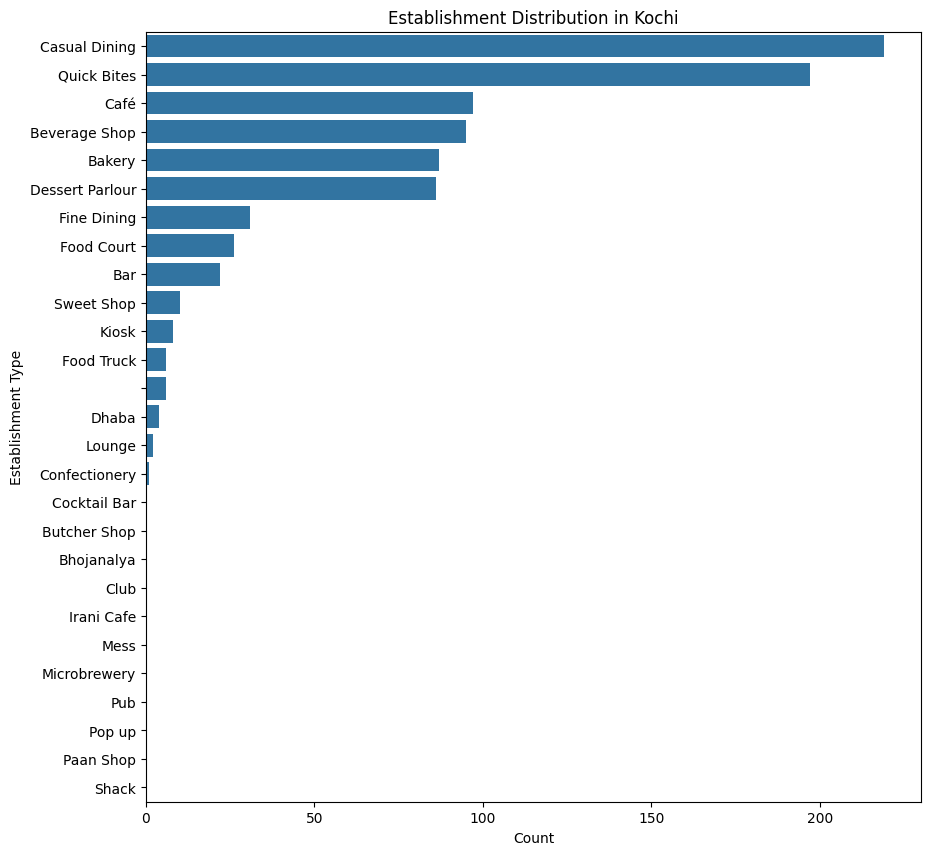

In [25]:
# Filter and sort the data for the selected city
establishment_data_city = establishment_data.loc[selected_city].sort_values(ascending=False)

# Plot the establishment distribution
plt.figure(figsize=(10, 10))
sns.barplot(x=establishment_data_city.values, y=establishment_data_city.index, orient='h')
plt.title(f"Establishment Distribution in {selected_city}")
plt.xlabel("Count")
plt.ylabel("Establishment Type")
plt.show()

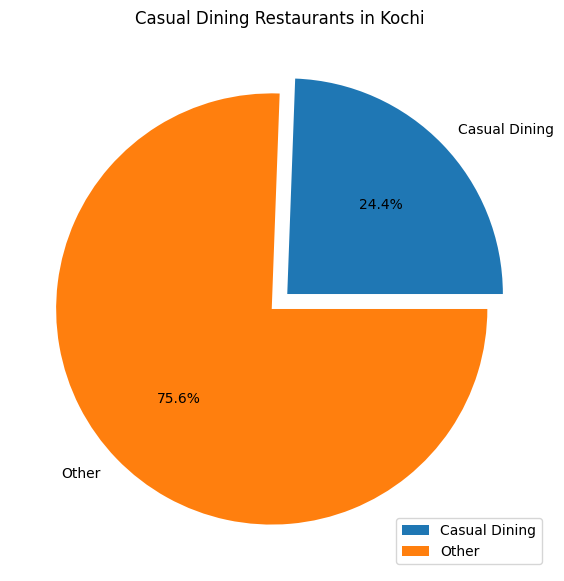

In [28]:
# Calculate the total and Casual Dining restaurant counts
total_restaurants = len(df_city)
casual_dining_count = len(df_city[df_city.establishment == "['Casual Dining']"])

# Pie chart data
sizes = [casual_dining_count, total_restaurants - casual_dining_count]

# Plotting
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=["Casual Dining", "Other"], autopct='%1.1f%%', shadow=False, explode=(0.05, 0.05))
plt.title(f"Casual Dining Restaurants in {selected_city}")
plt.legend(loc=4)
plt.show()


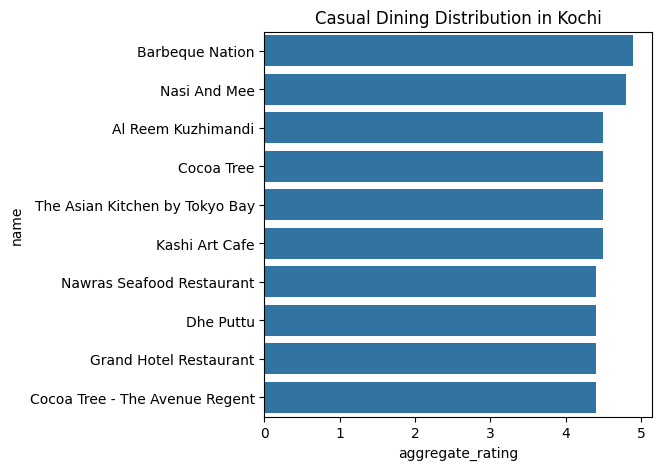

In [29]:
# Filter for Casual Dining restaurants
CasualDining_data = df_city[df_city.establishment == "['Casual Dining']"]

# Sort and get the top 10 Casual Dining restaurants by aggregate rating
graph_data = CasualDining_data.sort_values(["aggregate_rating"], ascending=False).head(10)

# Plotting
plt.figure(figsize=(5, 5))
sns.barplot(x="aggregate_rating", y="name", data=graph_data)
plt.title(f"Casual Dining Distribution in {selected_city}")
plt.show()


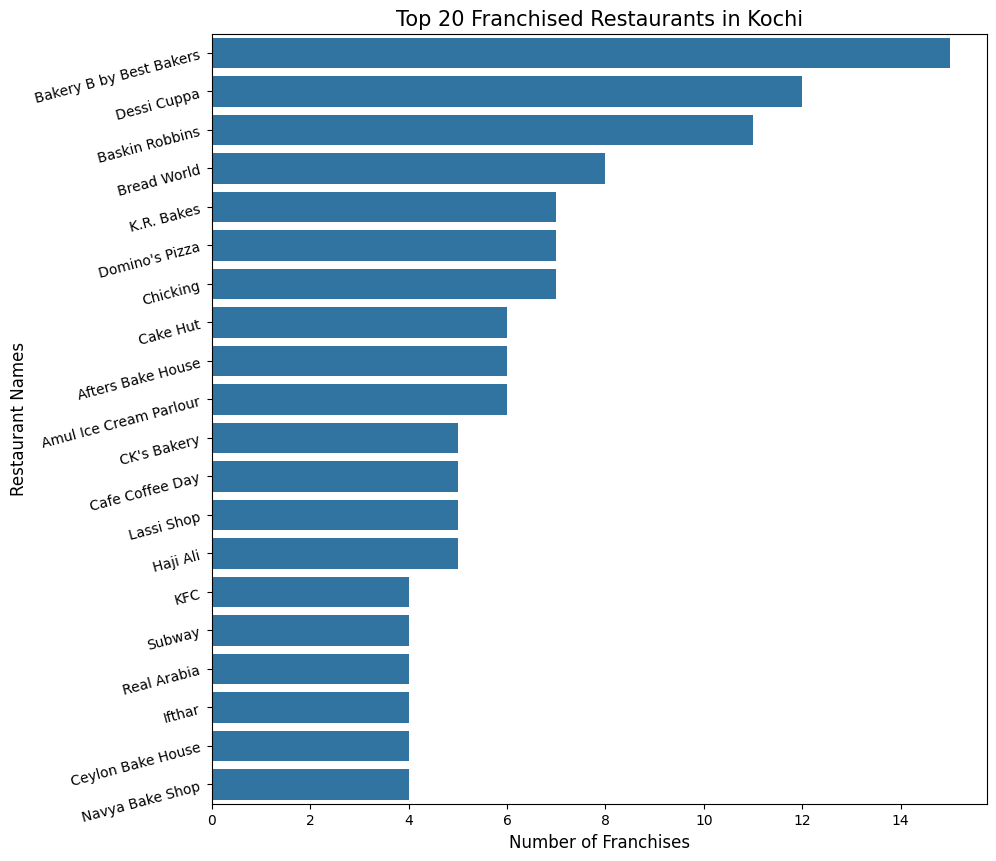

In [37]:
# Get the top 20 franchises by name count
number_of_franchised = df_city.name.value_counts()[:20]

# Plotting the top 20 franchises
plt.figure(figsize=(10, 10))
g = sns.barplot(y=number_of_franchised.index, x=number_of_franchised)

# Rotate y-axis labels without triggering a warning
plt.yticks(rotation=15)

# Adding title and labels
g.set_title(f"Top 20 Franchised Restaurants in {selected_city}", fontsize=15)
g.set_xlabel("Number of Franchises", fontsize=12)
g.set_ylabel("Restaurant Names", fontsize=12)

# Display the plot
plt.show()


In [44]:
# Calculate the rating number
df["rating_number"] = (df.aggregate_rating * 1000) / df.votes

# Get the top 10 highest-rated restaurants per city
Top_10_restaurants = df.sort_values("rating_number", ascending=False).groupby("city").head(10)

# Pivot the data to have columns for each top 10 rank
Top_10_restaurants_pivot = Top_10_restaurants.pivot_table(
    index='city', 
    columns=Top_10_restaurants.groupby('city').cumcount() + 1, 
    values='name', 
    aggfunc='first'
)

# Display the top 10 restaurants for a selected city
Top_10_restaurants_pivot.loc[selected_city]


1                        Baskin Robbins
2                           Dessi Cuppa
3                           Dessi Cuppa
4                             Fruit Bae
5                            Tea N Pulp
6             Seetha Devi Juice Parlour
7                             Cane Wave
8     The Seafood Grill - Trident Hotel
9                       Juice whichever
10                        Juice Makkani
Name: Kochi, dtype: object

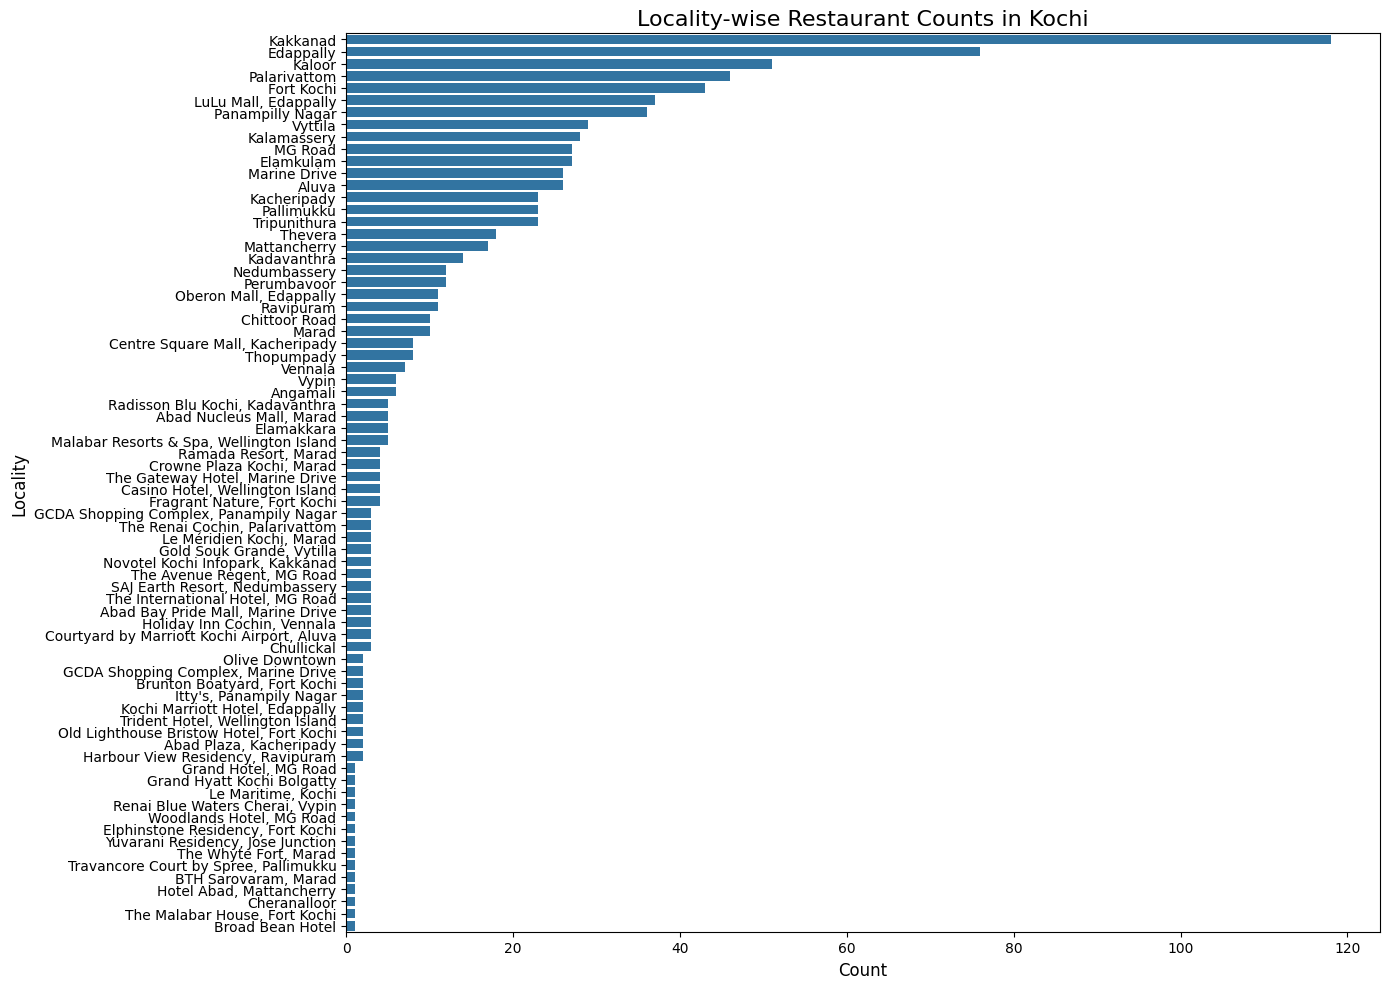

In [46]:
# Create a larger figure for better spacing
plt.figure(figsize=(14, 10))

# Create the bar plot
sns.barplot(x=df_city.locality.value_counts(), y=df_city.locality.value_counts().index)

# Customize the plot
plt.title(f"Locality-wise Restaurant Counts in {selected_city}", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Locality", fontsize=12)

# Rotate y-axis labels for better readability if needed
plt.yticks(rotation=0)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

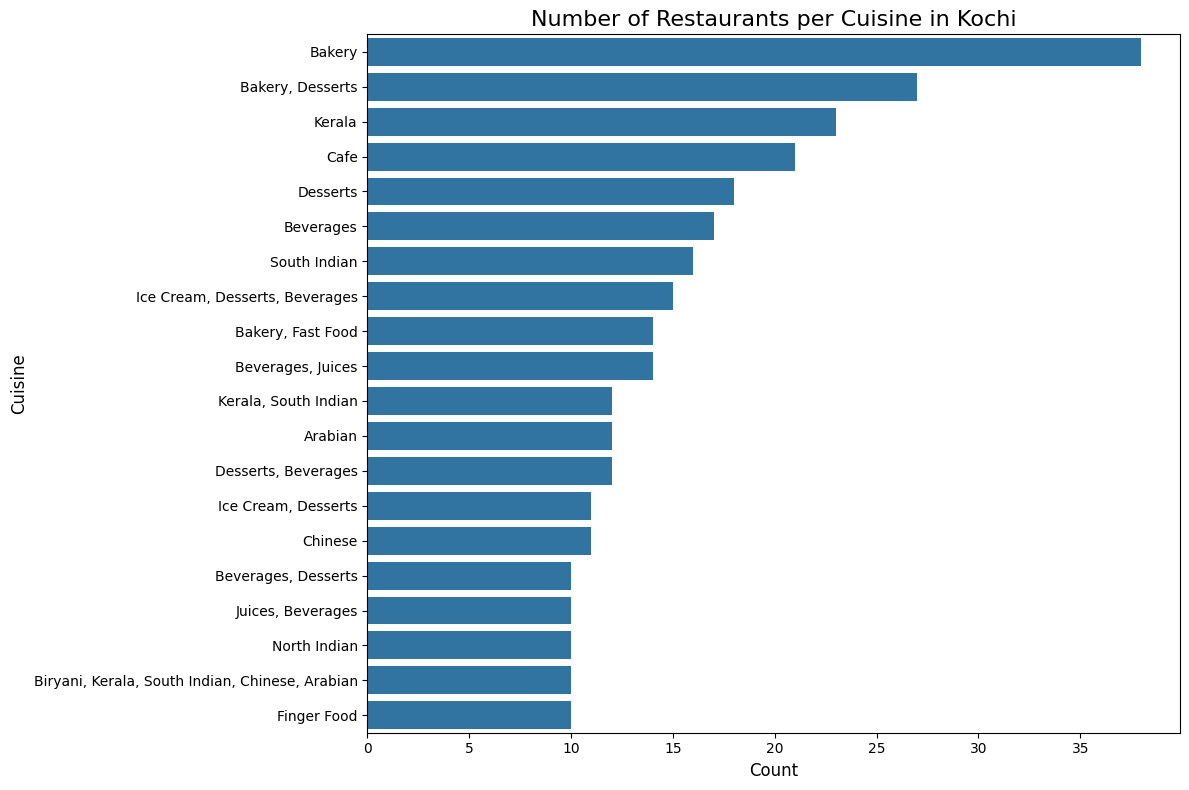

In [47]:
# Step 1: Create Top_20_Cuisines
Top_20_Cuisines = df_city.groupby(['city', 'cuisines']).size().unstack(fill_value=0)

# Step 2: Plot the data for the selected city
selected_city_cuisines = Top_20_Cuisines.loc[selected_city].sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.barplot(x=selected_city_cuisines.values, y=selected_city_cuisines.index)

# Customize the plot
plt.title(f"Number of Restaurants per Cuisine in {selected_city}", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Cuisine", fontsize=12)
plt.tight_layout()
plt.show()


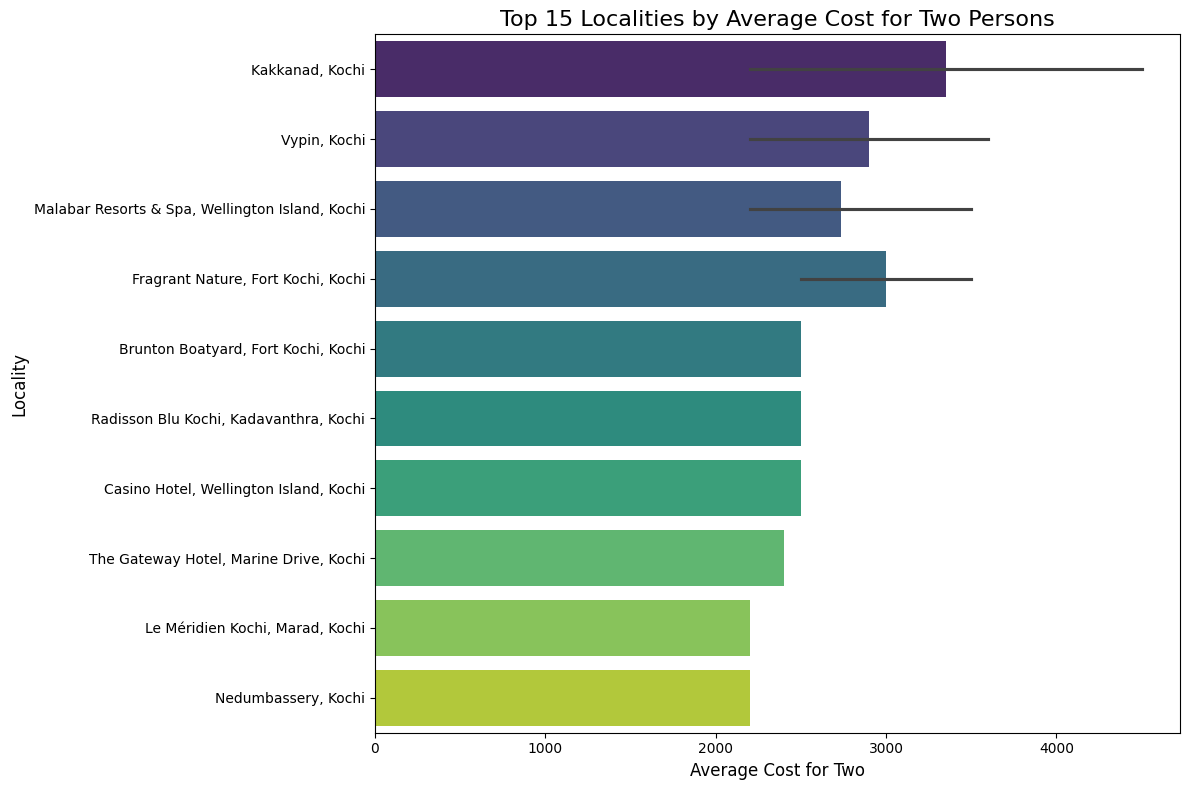

In [50]:
# Sort data by average cost for two
sorted_data = df_city.sort_values("average_cost_for_two", ascending=False)

# Limit to top 15 localities for better readability
top_localities = sorted_data.head(15)

# Plot
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.barplot(
    x="average_cost_for_two", 
    y="locality_verbose", 
    data=top_localities, 
    hue="locality_verbose",  # Set hue to the same as y for distinct colors
    dodge=False,             # Disable multiple bars per category
    palette="viridis"        # Specify the color palette
)

# Customize plot
plt.title("Top 15 Localities by Average Cost for Two Persons", fontsize=16)
plt.xlabel("Average Cost for Two", fontsize=12)
plt.ylabel("Locality", fontsize=12)
plt.legend([], [], frameon=False)  # Remove the legend
plt.tight_layout()  # Prevent overlap
plt.show()

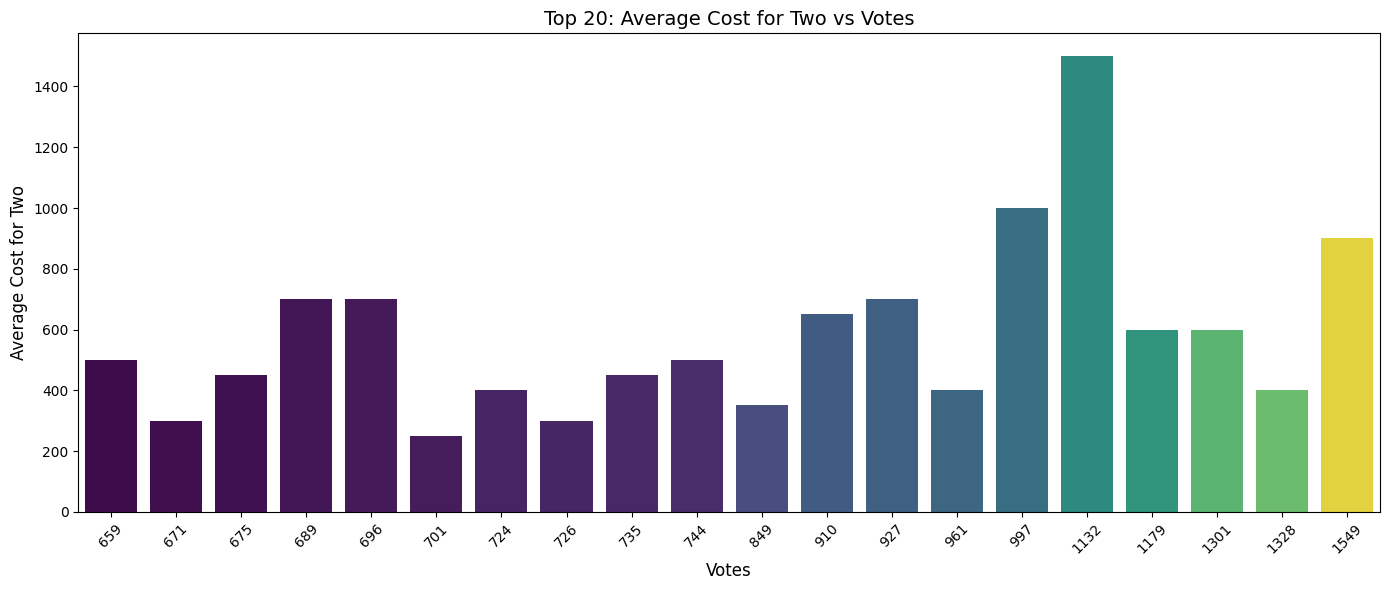

In [60]:
# Limit the data to the top votes to reduce congestion
top_votes = df_city.sort_values("votes", ascending=False).head(20)

# Plot: Average Cost for Two vs Votes
plt.figure(figsize=(14, 6))  # Adjust figure size
sns.barplot(
    data=top_votes, 
    x="votes", 
    y="average_cost_for_two", 
    palette="viridis", 
    hue="votes",
    legend=False 
)

# Customize the plot
plt.title("Top 20: Average Cost for Two vs Votes", fontsize=14)
plt.xlabel("Votes", fontsize=12)
plt.ylabel("Average Cost for Two", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Clean layout
plt.show()

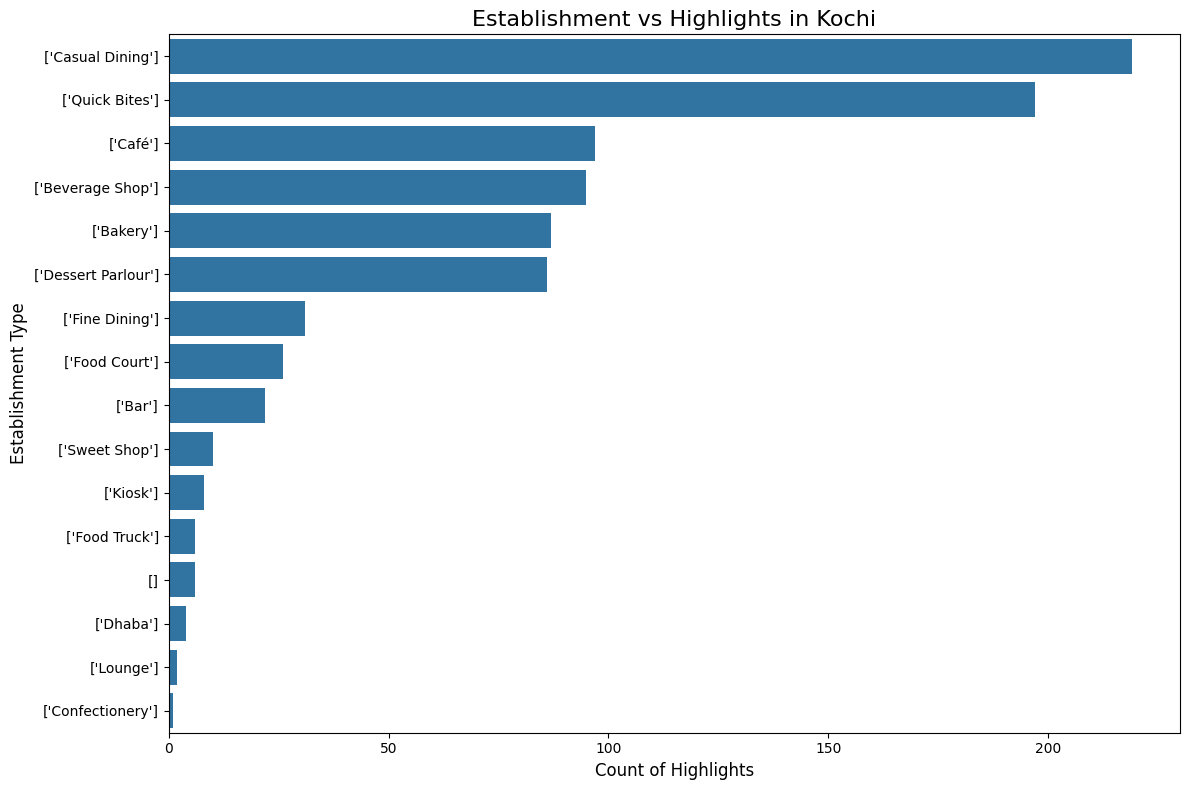

In [63]:
# Step 1: Group the data by 'establishment' and 'highlights' and count the number of occurrences
establishment_highlights = df_city.groupby(['establishment', 'highlights']).size().unstack(fill_value=0)

# Step 2: Summarize the data by counting the total number of highlights for each establishment
highlight_count = establishment_highlights.sum(axis=1)

# Step 3: Sort the highlights count and select top 20
sorted_highlight_count = highlight_count.sort_values(ascending=False)[:20]

# Step 4: Plot the data using barplot
plt.figure(figsize=(12, 8))
sns.barplot(y=sorted_highlight_count.index, x=sorted_highlight_count.values)

# Customize the plot
plt.title(f"Establishment vs Highlights in {selected_city}", fontsize=16)
plt.xlabel("Count of Highlights", fontsize=12)
plt.ylabel("Establishment Type", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

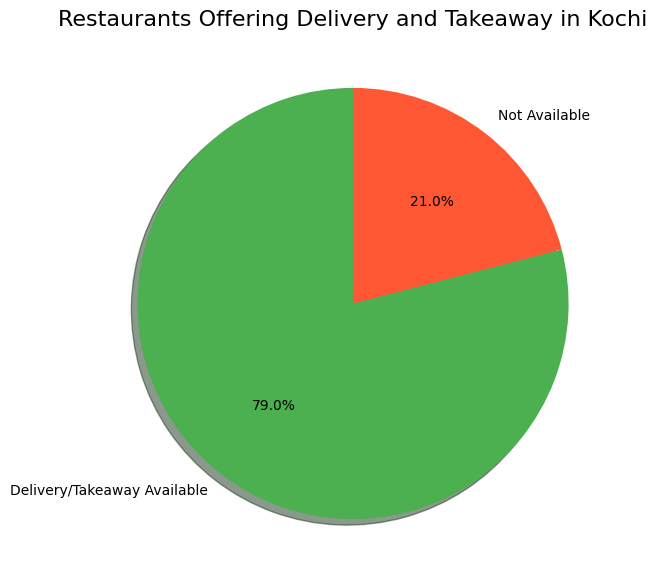

In [64]:
# Step 1: Count the number of restaurants that allow delivery and takeaway
delivery_takeaway_count = df_city[df_city['highlights'].str.contains('Delivery|Takeaway', na=False)]

# Step 2: Count how many restaurants allow delivery, takeaway, or neither
delivery_takeaway_sizes = [
    len(delivery_takeaway_count),  # Restaurants that allow delivery or takeaway
    len(df_city) - len(delivery_takeaway_count)  # Restaurants that do not allow delivery or takeaway
]

# Step 3: Create a pie chart
labels = ['Delivery/Takeaway Available', 'Not Available']
plt.figure(figsize=(7, 7))
plt.pie(delivery_takeaway_sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['#4CAF50', '#FF5733'])
plt.title(f"Restaurants Offering Delivery and Takeaway in {selected_city}", fontsize=16)

# Show the pie chart
plt.show()